# Structural Transformation and Misallocation

NOTES: 
  - Do simple structural first then add FI vs FS.
  - FS vs FI makes little difference... not enough distortion...
  - get to last section with variable labor.

Jonathan Conning

This notebook extends a simple model of structural transformation by adding a land-market misallocation within the agricultural sector that distorts the size distribution of farms. 

We adapt Lucas (1978) 'span-of-control' approach where each farmers non-traded farming skill determines the optimal scale of production and therefore also the size distribution of farms.  The actual size distribution of farms may diverge from the most efficient size distribution due to factor market imperfections, for example impediments to land transactions. Other papers, including Adamopoulos and Restuccia (2014) "The size distribution of farms and international productivity differences" (henceforth A&R), have adopted a similar framework, but here we work with a more tractable version.


## A benchmark model

This is like a specific factors model with land being specific to agriculture and labor mobile across sectors.  Each individual $i$ who is endowed with a non-traded farm skill ability $s_i$ which they discover only if they decide to become farm producers (see Lagakos and Waugh (2013) for a related model where skill is know prior to the choice of sector decision).  In an efficient allocation, those with higher farming skill would manage larger farms.

A&R adopted the assumption that each farm consists of just one operator. There is no other labor on the farm farm.  This is a simplifying and unrealistic assumption (that can be relaxed), but we'll stick with it for now. 

### Non-homothetic preferences and agricultural subsistence

$$
\phi \log(c_a - \bar a) + (1-\phi) \log(c_n)
$$

With non-homothetic Stone-Geary preferences such as this the household will first spend all resources on satisfying subsistence requirements (i.e. trying to reach $\bar a$). 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed
from scipy.optimize import fsolve, minimize

## Agriculture and 'structural transformation'

Sample model parameters

In [136]:
A = 1    # TFP in Ag
An = 1   # TFP in Non-Ag
p = 1    # relative price of ag (used only in certain plots)
Sbar = 100  # Total skill endowment 
Tbar = 100  # Total endowment of land
Nbar = 100  # Total endowment of labor
Kbar = 100
gamma = 0.54 # land and labor share in ag
alpha = 0.5  # labor share in non-ag
beta = 0.7   # share of labor in land and and labor share

phi = 0.2    # agriculture consumption share (at high levels of income)
aa = 50       # subsistence requirement

## Households, farms, and equilibrium

### Farm production 

A farm requires a single farm operator. Farmers are heterogenous in their non-traded skills, as summarized by the distribution $n_{ai}$ with $\sum n_{ai} =1$. A farmer with skill level $S_i$ and land input $T_i$ will produce using the following production function (linear homogenous in $S_i$ and $T_i$:

$$
F(S_i, T_i) = A S_i^{1-\gamma} T_i^{\gamma} 
$$

The 'stand-in' household maximizes their non-homothetic preferences.  The country produces what it consumes so we're really looking for a tangency between the PPF and an indifference curve.

Only once enough labor $\hat N_a$ has been allocated to subsistence will remaining labor $\bar N - \hat N_a$ be allocated between Agriculture and Non-Agriculture following constant expenditure shares.  The non-homoethetic preferences (and low weight $\phi$) insure that as the agricultural economy becomes more productive (due either to higher $A$ or $A_n$ and/or to the more efficient allocation of resources in agriculture) the share of the population in agriculture declines.

$$
\max \phi \log(c_a - \bar a) + (1-\phi) \log(c_n)
$$
subject to

$$
c_a + \bar a =  A \cdot \sum \mu_{i}N_a \cdot F(S_i, T_i)
$$

$$
c_n = A_n N_n^{\alpha}  
$$

$$
N_a + N_n = \bar N
$$



### The Distribution of non-traded skills

We focus here on simple discrete distributions.  To give a simple example, the following array summarize the share of of farmers in each skill class, and the skill level of each member of that class.

In [137]:
mui = np.array([0.25, 0.25, 0.15, 0.15, 0.20])
print(mui, sum(mui))

[0.25 0.25 0.15 0.15 0.2 ] 1.0


In [138]:
Si = np.array([0.1, 0.4, 1, 2.2, 10])  

The mean expected skill level is

$$
E(s) = \sum_i \mu_i \cdot S_i
$$

In [139]:
Es = np.sum(mui*Si)
Es

2.605

With $N_a$ (of $N$) households in agriculture the total skill deployed to agriculture is $N_a \cdot E(S)$

$$
N_a \cdot E(s)
$$

Remember individuals don't know their skill level until they enter agriculture (i.e. they can't sort themselves based on skill).  If there are $Na$ individuals in agriculture the total skill level would be $N_a \cdot E(s)$. 

#### Labor required for subsistence 

Let's solve for the agricultural farm population $N_a$ such that subsistence requirements are just met

$$
A \cdot (\hat N_a E(s))^{1-\gamma} \cdot T^\gamma = \bar a
$$

which yields

$$ 
\hat N_a = \frac{ \left ( \frac{\bar a}{A T^{\gamma} } \right )^\frac{1}{(1-\gamma)}}{E(s)}
$$

###  Efficient allocations

To equalize marginal products an achieve an efficient allocation of land. higher-skilled farmers must have access to larger farm plots. It is easy to show that efficient plot size will be proportional to the farmer's relative skill:

$$
T_i = \frac{ S_i}{E(s)} \cdot \frac{\bar T}{N_a}
$$

Higher than average skill farmers $(S_i>E(s))$ operate larger than average farms.

Substituting this land allocation into the expressions for the marginal product of land confirms that this this equalizes the marginal product of land across farms.

#### Efficient output and profits

Given an allocation of $N_a$ households to the agricultural sector, an efficient allocation of land across farms leads to total agricultural output:

$$
F(N_a) = N_a \cdot A \cdot \sum \mu_i S_i^{1-\gamma} \left (\frac{ S_i}{E(s)} \cdot \frac{\bar T}{N_a} \right )^\gamma
$$


$$
= N_a \left ( A E(s) \right )^{1-\gamma} \cdot  \bar T ^\gamma
$$

Farm "profits" are really a return to the farmers' non-traded skill. Total profits:

$$
\Pi = (1-\gamma) F(N_a)
$$

And profits are apportioned according to $\frac{ S_i}{E(s)} \frac{\Pi}{N_a}$

###  Inefficient but Egalitarian

Let's contrast the efficient allocation to allocations with an egalitarian norm where each household receives an equal allocation of land, regardless of skill, and the land market is shut down.

$$
T_i = \frac{\bar T}{N_a}
$$

And total output will be
$$
F^I(N_a) = A \cdot \sum n_i S_i^{1-\gamma} \left (\frac{\bar T}{N_a} \right )^\gamma
$$



$$
F^I(N_a) = A \cdot \left (\frac{\bar T}{N_a} \right )^\gamma \cdot \sum n_i S_i^{1-\gamma} 
$$

$$
F^I(N_a)  = A \left (N_a E(s) \right )^{1-\gamma} \cdot  \bar T ^\gamma   
  \cdot \frac{\sum n_i S_i^{1-\gamma}}{E(s)^{1-\gamma}}
$$


$$
F^I(N_a)  = F(N_a)   \cdot \sum n_i \left ( \frac{S_i}{E(s)} \right )^{1-\gamma} 
$$

This shows that if $S_i = E(s)$ (i.e. everyone has the same skill level) then the last term becomes 1 and the allocation is efficient. 

If however there is dispersion in the $S_i$ then the output of the agricultural sector will in general fall short of its efficient potential.

In our simple numerical example, the skill levels were 

In [140]:
Si

array([ 0.1,  0.4,  1. ,  2.2, 10. ])

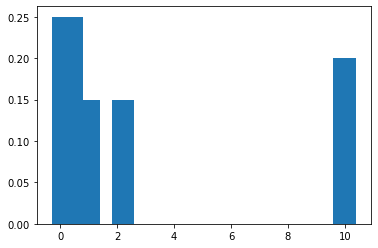

In [141]:
plt.bar(Si, mui);

So total skill in each group is

In [142]:
mui*Si

array([0.025, 0.1  , 0.15 , 0.33 , 2.   ])

Hence there is this much skill in each group

So output would be about 15 percent below efficient potential

In [144]:
np.sum(mui * (Si/Es)**(1-gamma))

0.7680687067633832

### General Equilibrium

In [146]:
def FS(Na, A=A, Tbar=Tbar):
    '''Efficient total production'''
    Es = np.sum(mui*Si)
    return A * (Na*Es)**(1-gamma) * Tbar**gamma

def FI(Na, A=A, Tbar=Tbar):
    '''Egalitarian inefficient production'''
    return FS(Na, A=A, Tbar=Tbar) * np.sum(mui * (Si/Es)**(1-gamma))

def G(Nn, An=An):
    return An * Nn**alpha * Kbar**(1-alpha)

def U(ca, cn, aa, phi):
    return phi*np.log(ca-aa) + (1-phi)*np.log(cn)

def indif(aa, phi, ubar):
    '''return a function that plots indifference curve of value ubar'''
    def idf(ca):
        H = (1/(1-phi))* (ubar - phi*np.log(ca-aa))
        return np.exp(H)
    return idf

In [12]:
def obj(x, A=A, An=An, aa=aa, Tbar=Tbar,  phi=phi):
    return -(phi*np.log(FS(x,  A, Tbar) - aa) + (1-phi)*np.log(G(Nbar-x, An)))

def objI(x, A=A, An=An, aa=aa, Tbar=Tbar,  phi=phi):
    '''The egalitarian but inefficient technology'''
    return -(phi*np.log(FI(x,  A, Tbar) - aa) + (1-phi)*np.log(G(Nbar-x, An)))

In [151]:
x0 = 50
sol = minimize(obj, x0, args=(A, An, aa, Tbar,  phi))
sol

      fun: -4.277484699798854
 hess_inv: array([[2773.92034083]])
      jac: array([-1.78813934e-07])
  message: 'Optimization terminated successfully.'
     nfev: 22
      nit: 5
     njev: 11
   status: 0
  success: True
        x: array([33.10460616])

In [148]:
def obj(x, A=A, An=An, aa=aa, Tbar=Tbar,  phi=phi):
    return -(phi*np.log(FS(x,  A, Tbar) - aa) + (1-phi)*np.log(G(Nbar-x, An)))

def objI(x, A=A, An=An, aa=aa, Tbar=Tbar,  phi=phi):
    '''The egalitarian but inefficient technology'''
    return -(phi*np.log(FI(x,  A, Tbar) - aa) + (1-phi)*np.log(G(Nbar-x, An)))

C:\Users\jconn\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
C:\Users\jconn\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


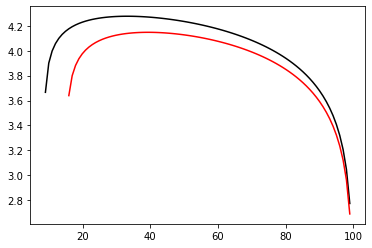

In [150]:
nna = np.linspace(1,99,100)
plt.plot(nna, -obj(nna), color='k')
plt.plot(nna, -objI(nna), color='r')
#plt.ylim(3,3.7);

In [14]:
sol

      fun: -3.5645670754954955
 hess_inv: array([[1450.68745884]])
      jac: array([7.4505806e-06])
  message: 'Optimization terminated successfully.'
     nfev: 42
      nit: 6
     njev: 14
   status: 0
  success: True
        x: array([14.09672331])

Package our solution optimizer into a function.  Here we are solving for the share of labor in agriculture that max's utility.

$$ 
\hat N_a = \frac{ \left ( \frac{\bar a}{A T^{\gamma} } \right )^\frac{1}{(1-\gamma)}}{E(s)}
$$

In [152]:
def Na_opt(A=A, An=An, aa=aa, Tbar=Tbar, phi=phi, obj=obj ):
    
    x0=aa
    sol = minimize(obj, x0, args=(A,An, aa,Tbar, phi))
    Na = sol.x[0]
    
    return Na, FS(Na, A, Tbar), G(Nbar-Na, An)

In [153]:
aa

50

In [154]:
Na_opt(A=A, aa=75, obj= objI)

(56.10678500921641, 119.07446290114243, 66.25195468118929)

In [155]:
interact(Na_opt, A=(0.5,1.5,0.1), aa=(0,90,1), An=(0.5,5,0.1), Tbar=(50,150,10), phi=(0.02, 0.4,0.02), obj=[obj, objI]);

interactive(children=(FloatSlider(value=1.0, description='A', max=1.5, min=0.5), FloatSlider(value=1.0, descri…

In [161]:
def ppfs(A=A, An=An, Tbar=Tbar, aa=aa, obj=obj, show=True):
    na = np.arange(1,Nbar,1)
    ca = np.arange(1,200,1)
    nahat = (aa/(A* Tbar**gamma ))**(1/(1-gamma))/Es
    Qa = FS(na, A, Tbar)
    Qn = G(Nbar-na, An)
    plt.xlim(0, 200)
    plt.ylim(0, 200)
    plt.plot(Qa, Qn,  color='k')
    NA, QA, QN = Na_opt(A, An, aa, Tbar, phi=phi, obj=obj)
    print(NA, QA, QN)
    ubar = U(QA, QN, aa, phi)
    plt.scatter(QA, QN, color='b')
    idf = indif(aa, phi, ubar)
    ca_ = ca[np.int64(QA*0.5): np.int64(QA*1.5) ]
    plt.plot(ca_, idf(ca_), color='r');
    plt.vlines(aa, ymin=0, ymax=Qn[0]*1.5, linestyle=':')
    print(f"Na_hat={nahat:2.2f}, Na/Nbar = {NA/Nbar:3.2f}, NA={NA:3.1f}, AFS = {Tbar/NA:3.1f}")
    plt.grid()
    if show:
      plt.show()

33.10460616340891 93.41577700172721 81.78960437402245
Na_hat=8.51, Na/Nbar = 0.33, NA=33.1, AFS = 3.0
39.266902021996515 101.04708942566701 77.93144293416071
Na_hat=8.51, Na/Nbar = 0.39, NA=39.3, AFS = 2.5


C:\Users\jconn\anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
C:\Users\jconn\anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in log


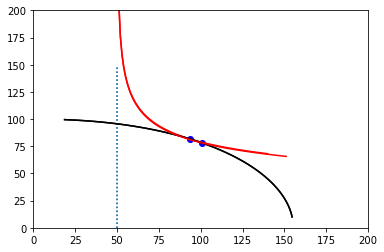

In [162]:
ppfs(A= 1, aa=50, obj=obj, show=False)
ppfs(A= 1, aa=50, obj=objI)

In [163]:
interact(ppfs, aa=(5,75,5), A=(1,3,0.1), An=(2,3,0.1), Tbar=(50,200,10), obj= [obj, objI], show=fixed(True));

interactive(children=(FloatSlider(value=1.0, description='A', max=3.0, min=1.0), FloatSlider(value=2.0, descri…

---

##  Four quadrant diagram

Reminiscent of Fei and Ranis..These used to be my favorites..

In [164]:
def fourquad(A=A, An=An, Tbar=Tbar, aa=aa):
    gmax = 150
    nn = np.linspace(0.1, Nbar,100)
    plt.figure(figsize=(10,10))
    ppfs(A=A, An=An, Tbar=Tbar, aa=aa, show=False)
    plt.xlim(-gmax, gmax)
    plt.ylim(-gmax, gmax)
    plt.plot(FS(nn, A=A, Tbar=Tbar), -nn)
    plt.plot(-nn, G(nn, An) )
    plt.plot(-nn, nn-Nbar)
    NA, QA, QN = Na_opt(A, An, aa, Tbar, phi=phi)
    plt.hlines(-NA, xmin=(NA-Nbar), xmax=QA,linestyle=":")
    plt.hlines(QN, xmin=(NA-Nbar), xmax=QA,linestyle=":")
    plt.vlines(QA, ymin=-NA, ymax=QN,linestyle=":")
    plt.vlines(NA-Nbar, ymin=-NA, ymax=QN,linestyle=":")
    ax = plt.gca()
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.text(gmax*0.90,-10,r'$Q_A$', fontsize=15)
    plt.text(-3,gmax,r'$Q_N$', fontsize=15)
    plt.text(0,-0.9*gmax,'$N_a$', rotation=-90, fontsize=15)
    plt.text(-0.9*gmax,2,r'$N_n$', fontsize=15)
    plt.text(FS(55, A=A, Tbar=Tbar), -60, r'$F(N_a)$', fontsize=15)
    plt.text(-95, G(95, An=An), r'$G(N_n)$', fontsize=15)
    plt.show()

33.10460616340891 93.41577700172721 81.78960437402245
Na_hat=8.51, Na/Nbar = 0.33, NA=33.1, AFS = 3.0


C:\Users\jconn\anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
C:\Users\jconn\anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in log


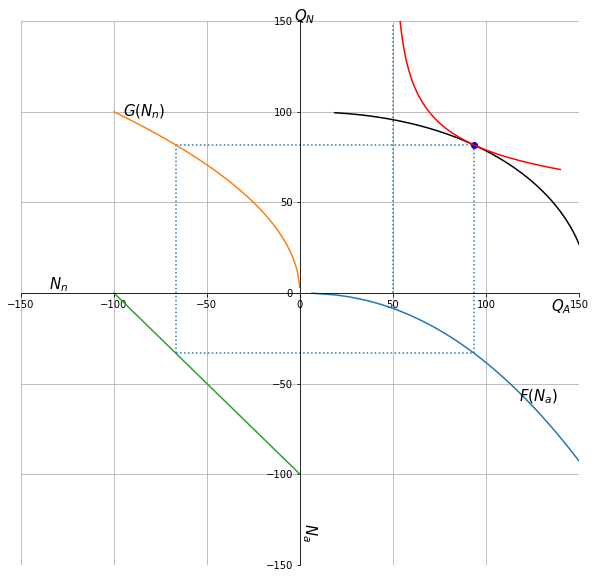

In [165]:
fourquad()

In [167]:
interact(fourquad, A=(0.1,2,0.05), An=(1,2,0.1),  aa=(5,80,1), Tbar=(50,400,25));

interactive(children=(FloatSlider(value=1.0, description='A', max=2.0, min=0.1, step=0.05), FloatSlider(value=…

## OLDER STUFF 


### Earlier model with variable number of workers in AG

In [23]:
def F(Na, T=Tbar, A=A):
    return A * (T**(1-beta) * Na**beta)**gamma

def G(Nn, An=An):
    return An * Nn**alpha

In [24]:
def MVPLN(Nn, An=An):
    return alpha*G(Nn, An)/Nn

def MVPLA(Na, p, T=Tbar, A=A):
    '''Assumes total profits divided by Na'''
    return p*beta*gamma*F(Na, T, A)/Na

def U(ca, cn, aa, phi):
    return phi*np.log(ca-aa) + (1-phi)*np.log(cn)

def indif(ca, aa, ubar, phi=phi):
    logcn =  np.exp(ubar - phi(np.log(ca-aa)) )/(1-phi)
    return np.exp(logcn)

The minimum amount of labor required to satisfy subsistence needs

$$ 
\hat N_a = \left ( \frac{\bar a}{A T^{\beta \gamma} } \right )^\frac{1}{\gamma (1-\beta)}
$$

In [25]:
def Na_hat(aa=aa, Tbar=Tbar, A=A):
    return (aa/(A*Tbar**((1-beta)*gamma))) **(1/(gamma*beta))


In [26]:
interact(Na_hat, aa=(0,10,1), Tbar=(50,200,10), A=(1,5,0.1));

interactive(children=(IntSlider(value=5, description='aa', max=10), IntSlider(value=100, description='Tbar', m…

In [27]:
def obj(x, A=A, An=An, aa=aa, Tbar=Tbar,  phi=phi):
    return -(phi*np.log(F(x, Tbar, A) - aa) + (1-phi)*np.log(G(Nbar-x, An)))

Illustration of how to maximize the objective and find a solution.

In [28]:
x0 = 50
sol = minimize(obj, x0, args=(A, An, aa, Tbar,  phi))

In [29]:
sol

      fun: -3.0095233249268687
 hess_inv: array([[1530.3383219]])
      jac: array([-6.04987144e-06])
  message: 'Optimization terminated successfully.'
     nfev: 33
      nit: 5
     njev: 11
   status: 0
  success: True
        x: array([19.33072965])

In [30]:
def Na_opt(A=A, An=An, aa=aa, Tbar=Tbar, phi=phi ):
    
    sol = minimize(obj, x0,args=(A,An, aa,Tbar, phi))
    Na = sol.x[0]
    
    return Na, F(Na, Tbar, A), G(Nbar-Na, An)

Explore how it responds to parameters...

All seems to make sense

In [31]:
def ppf(A=A, An=An, Tbar=Tbar, aa=aa, show=True):
    na = np.arange(1,Nbar,1)
    ca = np.arange(1,20,1)
    nahat = (aa/(A* Tbar**((1-beta)*gamma) ))**(1/(gamma*beta))
    Qa = F(na, Tbar, A)
    Qn = G(Nbar-na, An)
    plt.xlim(0,100)
    plt.ylim(0,100)
    plt.plot(Qa, Qn)
    NA, QA, QN = Na_opt(A, An, aa, Tbar, phi=phi)
    ubar = U(QA, QN, aa, phi)
    #plt.plot(ca, indif(ca, aa, ubar))
    plt.scatter(QA, QN)
    plt.vlines(aa, ymin=0, ymax=Qn[0]*1.5)
    print(f"Na_hat={nahat:2.2f}, Na/Nbar = {NA/Nbar:3.2f}, NA={NA:3.1f}, AFS = {Tbar/NA:3.1f}")
    if show:
        plt.show()

In [32]:
def U(ca, cn, aa, phi):
    return phi*np.log(ca-aa) + (1-phi)*np.log(cn)

def indif(ca, aa, ubar, phi=phi):
    np.where(ca >aa, np.exp( (ubar - phi*np.log(ca-aa) )/(1-phi) ), 0 )   